# Challenge: Telecom X – Parte 2: Predicción de Cancelación (Churn)

Misión: Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios para permitir a la empresa anticiparse al problema.

# 1. Preparación de los Datos

En esta primera fase, preparamos el conjunto de datos para que pueda ser utilizado por los algoritmos de Machine Learning.

## 1.1. Carga del Archivo Tratado

In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("datos_tratados.csv")

# Renombrar las columnas para evitar problemas con el punto
df.rename(columns={'Charges.Monthly': 'MonthlyCharges', 'Charges.Total': 'TotalCharges'}, inplace=True)

# Convertir 'TotalCharges' a tipo numérico y manejar los valores nulos si los hay
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

print("Primeras 5 filas del DataFrame:")
df.head()

Primeras 5 filas del DataFrame:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,0,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,0
1,0003-MKNFE,1,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,0
2,0004-TLHLJ,1,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,1
3,0011-IGKFF,1,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,1
4,0013-EXCHZ,0,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,1


In [2]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## 1.2. Eliminación de Columnas Irrelevantes

La columna customerID es un identificador único que no aporta valor predictivo al modelo, por lo que la eliminaré.

In [3]:
# Eliminar la columna 'customerID'
df.drop('customerID', axis=1, inplace=True)
print("\nColumnas del DataFrame después de eliminar 'customerID':")
print(df.columns)


Columnas del DataFrame después de eliminar 'customerID':
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## 1.3. Codificación (Encoding)

Este paso es fundamental, ya que los modelos de Machine Learning no pueden procesar variables de texto.

In [4]:
# Identificar columnas categóricas (que no sean numéricas)
columnas_categoricas = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, dtype=int)

print("\nPrimeras 5 filas del DataFrame codificado:")
df_encoded.head()


Primeras 5 filas del DataFrame codificado:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,9,1,0,59.9,542.40,0,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,1,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,1,...,0,1,0,1,0,0,0,0,1,0
4,0,1,1,0,3,1,1,83.9,267.40,1,...,1,0,0,1,0,0,0,0,0,1


In [5]:
# Verificar las nuevas columnas creadas
print(df_encoded.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_0', 'MultipleLines_1',
       'MultipleLines_No phone service', 'InternetService_0',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_No internet service', 'OnlineBackup_0',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_No internet service', 'TechSupport_0',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_0',
       'StreamingTV_1', 'StreamingTV_No internet service', 'StreamingMovies_0',
       'StreamingMovies_1', 'StreamingMovies_No internet service',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automat

## 1.4. Verificación de la Proporción de Cancelación (Churn)

Analizamos el balance de la variable objetivo. Un desbalance severo puede afectar el rendimiento del modelo en la clase minoritaria.


Proporción de Cancelación (Churn):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64



/tmp/ipython-input-3907846602.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_encoded, palette='viridis')


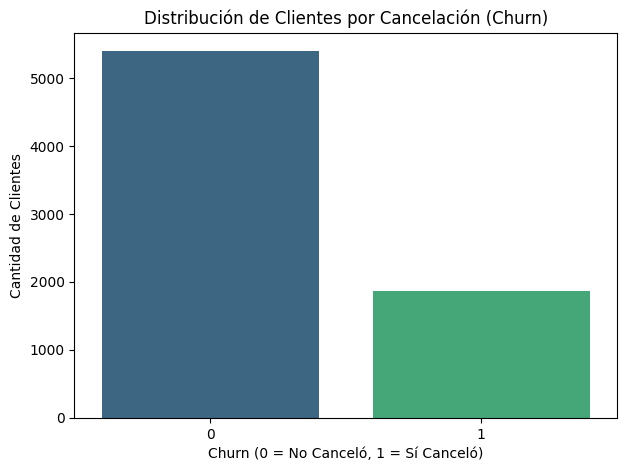

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular y visualizar la proporción de Churn
churn_proportion = df_encoded['Churn'].value_counts(normalize=True) * 100
print(f"\nProporción de Cancelación (Churn):\n{churn_proportion}\n")

plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df_encoded, palette='viridis')
plt.title('Distribución de Clientes por Cancelación (Churn)')
plt.xlabel('Churn (0 = No Canceló, 1 = Sí Canceló)')
plt.ylabel('Cantidad de Clientes')
plt.show()

## 1.5. Balanceo de Clases con SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después de SMOTE
print("Distribución de clases ANTES de SMOTE:", Counter(y_train))
print("Distribución de clases DESPUÉS de SMOTE:", Counter(y_train_res))

Distribución de clases ANTES de SMOTE: Counter({0: 4318, 1: 1495})
Distribución de clases DESPUÉS de SMOTE: Counter({0: 4318, 1: 4318})


## 1.6. Normalización o Estandarización de los Datos

In [10]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas a estandarizar
columnas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas numéricas del conjunto de entrenamiento
X_train_res[columnas_numericas] = scaler.fit_transform(X_train_res[columnas_numericas])

# Transformar las columnas numéricas del conjunto de prueba
X_test[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

# Opcional: Verificar que la estandarización funcionó
print("Media de las columnas numéricas en el conjunto de entrenamiento (después de estandarizar):\n", X_train_res[columnas_numericas].mean())
print("\nDesviación estándar de las columnas numéricas en el conjunto de entrenamiento (después de estandarizar):\n", X_train_res[columnas_numericas].std())

Media de las columnas numéricas en el conjunto de entrenamiento (después de estandarizar):
 tenure           -6.582147e-18
MonthlyCharges    1.826546e-16
TotalCharges     -2.254385e-16
dtype: float64

Desviación estándar de las columnas numéricas en el conjunto de entrenamiento (después de estandarizar):
 tenure            1.000058
MonthlyCharges    1.000058
TotalCharges      1.000058
dtype: float64


# 2. Correlación y Selección de Variables

## 2.1. Análisis de Correlación

Una matriz de correlación nos ayuda a identificar las relaciones lineales entre las variables numéricas y nuestra variable objetivo.

Correlación de las variables con 'Churn':
Churn                                      1.000000
Contract_Month-to-month                    0.395584
OnlineSecurity_0                           0.335656
TechSupport_0                              0.330446
InternetService_Fiber optic                0.300949
PaymentMethod_Electronic check             0.294626
OnlineBackup_0                             0.263111
DeviceProtection_0                         0.246919
MonthlyCharges                             0.189866
PaperlessBilling                           0.186666
SeniorCitizen                              0.146733
StreamingMovies_0                          0.128721
StreamingTV_0                              0.126795
StreamingTV_1                              0.062430
StreamingMovies_1                          0.060586
MultipleLines_1                            0.039343
PhoneService                               0.012571
gender                                    -0.009555
MultipleLines_No phone

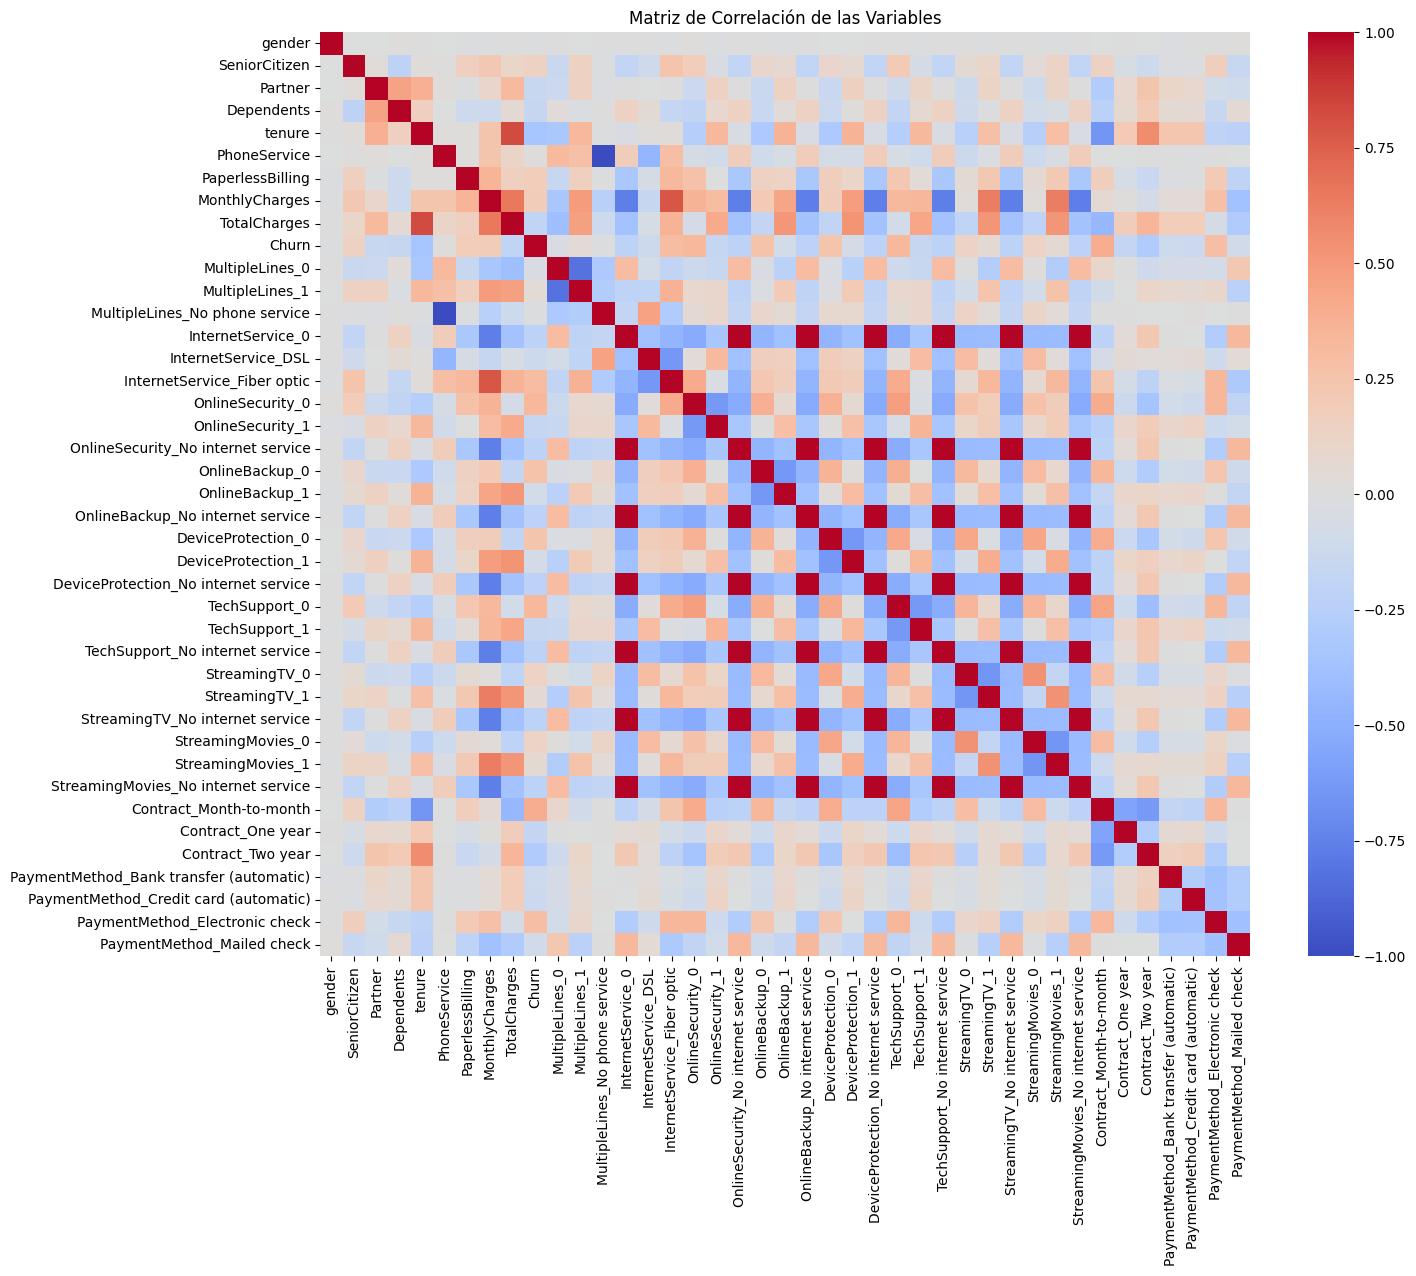

In [15]:
# Calcular la matriz de correlación del DataFrame codificado
corr_matrix = df_encoded.corr()

# Filtrar la correlación de la columna 'Churn'
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

print("Correlación de las variables con 'Churn':")
print(corr_with_churn)

# Visualizar la matriz de correlación completa
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')
plt.show()

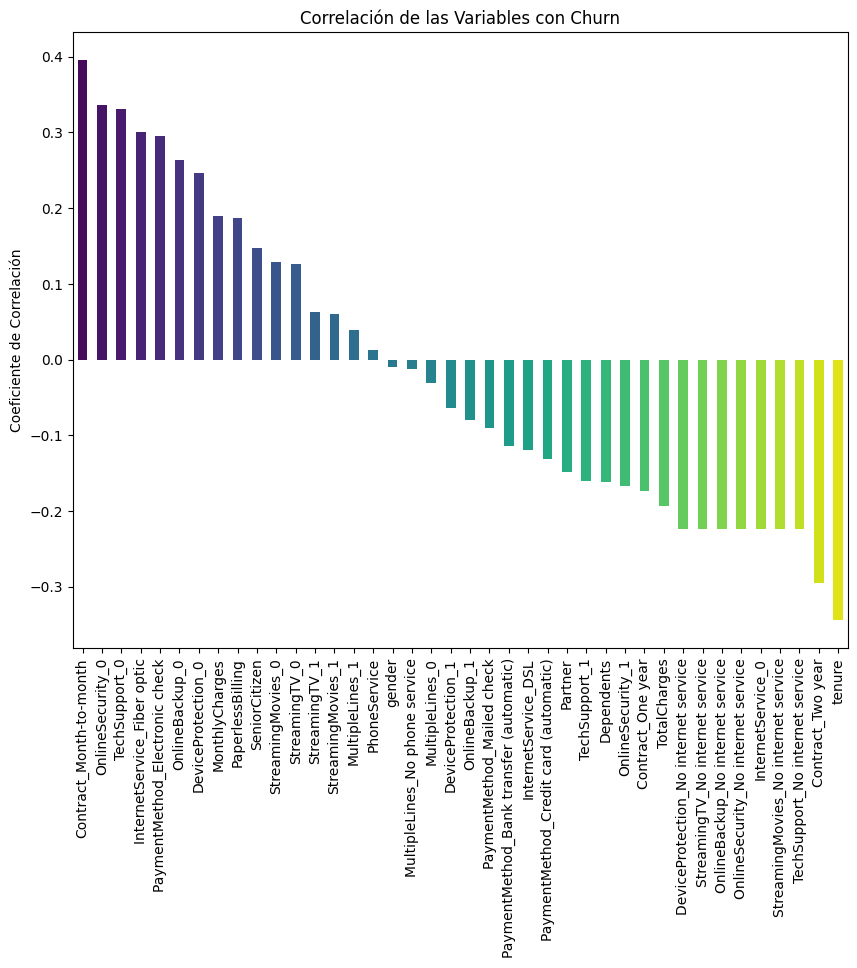


Top 10 variables con mayor correlación (positiva y negativa) con Churn:
Churn                             1.000000
Contract_Month-to-month           0.395584
OnlineSecurity_0                  0.335656
TechSupport_0                     0.330446
InternetService_Fiber optic       0.300949
PaymentMethod_Electronic check    0.294626
Name: Churn, dtype: float64
InternetService_0                     -0.224051
StreamingMovies_No internet service   -0.224051
TechSupport_No internet service       -0.224051
Contract_Two year                     -0.295138
tenure                                -0.344079
Name: Churn, dtype: float64


In [16]:
# Visualizar las correlaciones más importantes
plt.figure(figsize=(10, 8))
corr_with_churn.drop('Churn').plot(kind='bar', color=sns.color_palette("viridis", len(corr_with_churn)))
plt.title('Correlación de las Variables con Churn')
plt.ylabel('Coeficiente de Correlación')
plt.show()

print("\nTop 10 variables con mayor correlación (positiva y negativa) con Churn:")
print(corr_with_churn.head(6))
print(corr_with_churn.tail(5))

## 2.2. Análisis Dirigido

### Tiempo de Contrato (Tenure) vs. Cancelación (Churn)

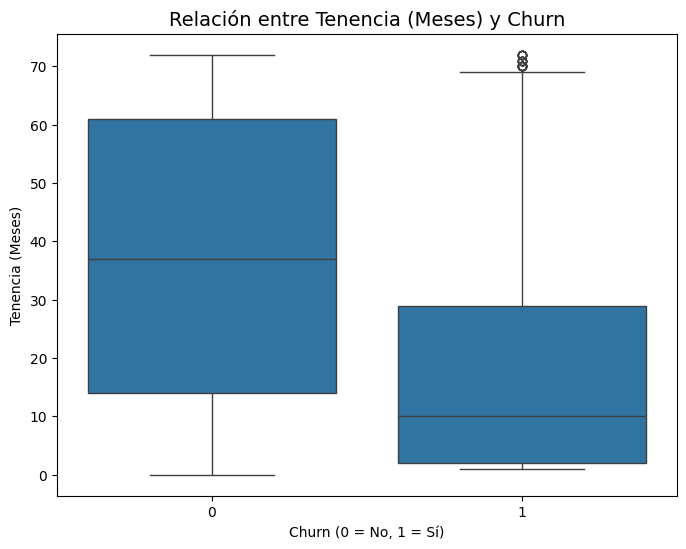

In [20]:
# Crear un boxplot para visualizar la relación entre 'tenure' y 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Relación entre Tenencia (Meses) y Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Tenencia (Meses)')
plt.show()

*Insight: Los clientes que cancelan tienden a tener una antigüedad mucho menor. La retención es más fuerte en clientes con más tiempo en la compañía.*

### Gasto Total (TotalCharges) vs. Cancelación (Churn)

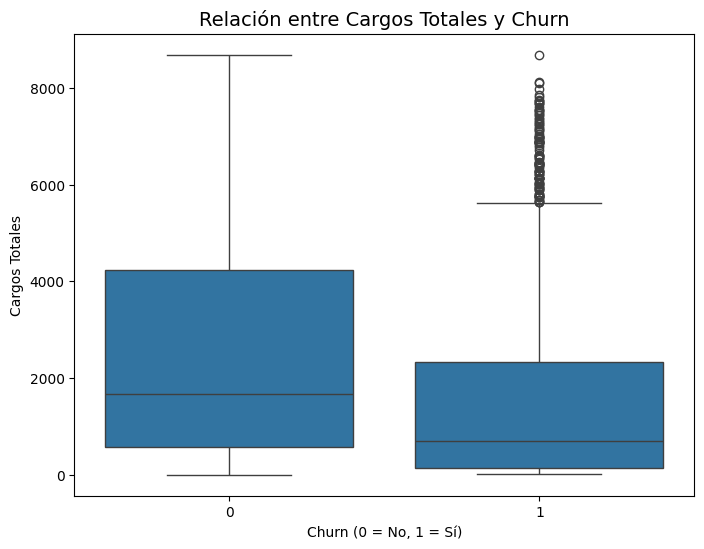

In [22]:
# Crear un boxplot para 'TotalCharges' vs 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df_encoded)
plt.title('Relación entre Cargos Totales y Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cargos Totales')
plt.show()

*Insight: Los clientes que cancelan tienden a tener cargos totales más bajos, lo cual es consistente con una menor tenencia. Refuerza la idea de que los clientes que se van no han llegado a generar un alto valor a lo largo del tiempo (Lifetime Value).*

# 3. Modelado Predictivo

## 3.1. Separación de Datos

Dividimos los datos para entrenar los modelos y luego evaluarlos con datos que nunca han visto. Usaremos una división 70/30, estratificando por la variable Churn para mantener la proporción en ambos conjuntos.

In [25]:
# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Forma de X_train: (5086, 40)
Forma de X_test: (2181, 40)
Tamaño del conjunto de entrenamiento: 5086 muestras
Tamaño del conjunto de prueba: 2181 muestras


## 3.2. Normalización de Datos (para Regresión Logística)

Este paso es crucial para modelos sensibles a la escala de los datos, como la Regresión Logística. Asegura que ninguna variable domine a otras solo por tener una magnitud mayor.

In [27]:
# Identificar las columnas numéricas originales para escalar
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Ajustar el escalador SOLO en los datos de entrenamiento para evitar fuga de datos
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Aplicar la misma transformación a los datos de prueba
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nPrimeras filas de X_train con datos escalados:")
X_train.head()


Primeras filas de X_train con datos escalados:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_0,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6057,0,0,1,1,1.611892,1,0,1.425011,2.385713,0,...,0,1,0,0,0,1,0,1,0,0
2990,0,0,0,0,-1.113507,1,0,-1.479767,-0.956126,1,...,0,0,1,1,0,0,0,1,0,0
5178,0,1,1,0,1.327149,1,1,1.385220,2.085400,0,...,0,1,0,0,1,0,0,0,1,0
5917,0,0,0,0,-0.096567,1,1,0.491569,0.070315,0,...,0,1,0,0,1,0,0,1,0,0
3137,0,0,1,1,-0.747409,1,1,0.876220,-0.446701,0,...,0,1,0,1,0,0,1,0,0,0


## 3.3. Creación de Modelos

Crearé y entrenaré dos modelos: Regresión Logística y Random Forest.

### Modelo 1: Regresión Logística

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Crear y entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 1, ..., 1, 1, 0])

### Modelo 2: Random Forest

Este modelo no requiere normalización de datos, pero como ya los tenemos separados, lo entrenaré con los mismos datos para una comparación justa.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 1, 0])

## 3.4. Evaluación de los Modelos

### 3.4.1. Evaluación del Modelo de Regresión Logística

In [31]:
# Predicciones de ambos modelos
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Reportes de clasificación
print("---  Evaluación del Modelo de Regresión Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['No Churn', 'Churn']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

print("\n" + "="*50 + "\n")

print("---  Evaluación del Modelo de Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

---  Evaluación del Modelo de Regresión Logística ---
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1620
       Churn       0.63      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181

Accuracy: 0.8006


---  Evaluación del Modelo de Random Forest ---
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1620
       Churn       0.60      0.47      0.53       561

    accuracy                           0.78      2181
   macro avg       0.71      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181

Accuracy: 0.7831


### 3.4.2. Visualización de las Matrices de Confusión

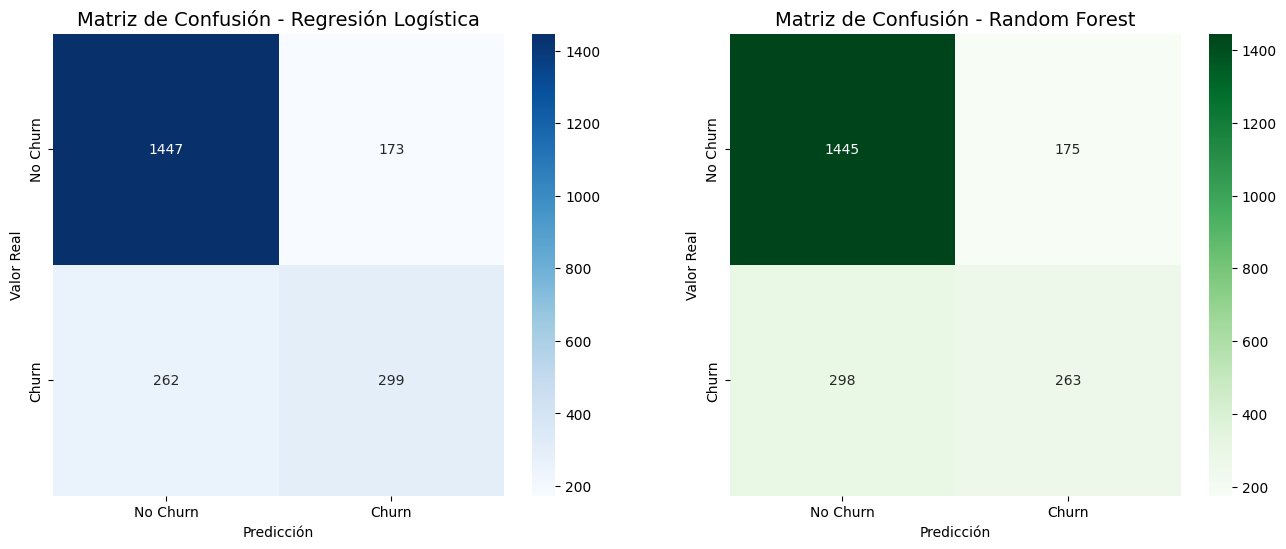

In [38]:
# Visualización de Matrices de Confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Matriz de Confusión - Regresión Logística', fontsize=14)
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[1].set_title('Matriz de Confusión - Random Forest', fontsize=14)
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.show()

**Interpretación de cada matriz:**

**Regresión Logística**

- Verdaderos negativos (TN): 1447 — clientes que no hicieron churn y fueron correctamente clasificados.

- Falsos positivos (FP): 173 — clientes que no hicieron churn pero el modelo dijo que sí.

- Falsos negativos (FN): 262 — clientes que sí hicieron churn, pero el modelo no los detectó.

- Verdaderos positivos (TP): 299 — clientes que hicieron churn y fueron correctamente identificados.

**Random Forest**

- TN: 1445

- FP: 175

- FN: 298 (mayor que la regresión logística → peor para detectar churn)

- TP: 263 (menor que la regresión logística)


### 3.4.3. Curva ROC y Área Bajo la Curva (AUC)

La curva ROC es una excelente herramienta para evaluar la capacidad de un modelo para distinguir entre clases. Un AUC cercano a 1 indica un modelo excelente.

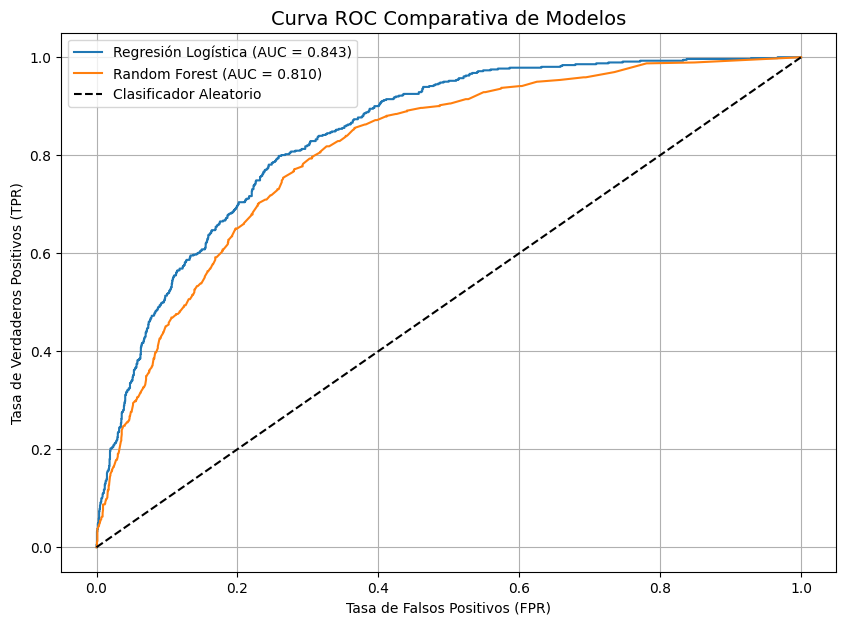

In [35]:
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)

# Obtener probabilidades de predicción para la clase positiva (Churn=1)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = random_forest.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Calcular puntos de la curva ROC
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Graficar
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Regresión Logística (AUC = {auc_log_reg:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa de Modelos', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### 3.4.4. Análisis Comparativo y Elección del Modelo

Accuracy (Exactitud): Ambos modelos tienen una exactitud similar (80%), Regresion Logistica (80.06%) y Random Forest (78.31%).

Precision vs. Recall (Clase 'Churn'):

* Regresión Logística: Tiene una precisión de 0.63 (de los que predijo como Churn, el 63% eran correctos) y un recall de 0.53 (identificó al 53% de todos los que realmente hicieron Churn).

* Random Forest: Tiene una precisión ligeramente inferior (60%) y un recall también inferior (47%).

AUC-ROC: La Regresión Logística tiene un área bajo la curva ligeramente superior (0.843 vs 0.81), lo que indica una mejor capacidad general para discriminar entre clientes que cancelan y los que no.

### ¿Cuál modelo tuvo el mejor desempeño?

Para este problema de negocio, identificar a los clientes que podrían cancelar (alto Recall) es a menudo más importante que ser perfectamente preciso. Queremos contactar a tantos clientes en riesgo como sea posible, incluso si algunos de ellos no iban a cancelar.

Dicho esto, el modelo de Regresión Logística ofrece un mejor equilibrio general y un rendimiento ligeramente superior en casi todas las métricas clave (Precision, Recall y AUC). Por lo tanto, lo seleccionamos como el mejor modelo. Ninguno de los modelos muestra un overfitting grave.

# 4. Interpretación y Conclusiones

## 4.1. Análisis de Importancia de las Variables

### Regresión Logística: ¿Qué impulsa el Churn?

Los coeficientes del modelo nos dicen el impacto de cada variable en la probabilidad de cancelación.

In [41]:
import numpy as np
# Crear un DataFrame con los coeficientes
coefficients = pd.DataFrame(log_reg.coef_[0], X_train.columns, columns=['Coefficient'])
coefficients['abs_coefficient'] = np.abs(coefficients['Coefficient'])

# Ordenar por el valor absoluto para ver el impacto
sorted_coeffs = coefficients.sort_values('abs_coefficient', ascending=False)

print("Variables más influyentes según la Regresión Logística:")
sorted_coeffs.drop('abs_coefficient', axis=1).head(10)

Variables más influyentes según la Regresión Logística:


,Coefficient
tenure,-1.391954
Contract_Two year,-0.752524
TotalCharges,0.672081
InternetService_DSL,-0.651926
MonthlyCharges,-0.577719
InternetService_Fiber optic,0.539784
Contract_Month-to-month,0.484361
PaperlessBilling,0.383377
StreamingTV_No internet service,-0.333972
TechSupport_No internet service,-0.333972


## 4.2. Conclusión

Basado en los coeficientes del modelo de Regresión Logística, hemos identificado los factores más influyentes en la decisión de un cliente de cancelar el servicio. A continuación, se presentan los hallazgos clave y las estrategias recomendadas.

### **Principales Impulsores de la Cancelación de Clientes:**

1. Tipo de Contrato (Mes a Mes): Es, con diferencia, el predictor más fuerte de cancelación. Los clientes sin un compromiso a largo plazo son altamente volátiles.

2. Antigüedad del Cliente (Tenure): El modelo confirma que cada mes que un cliente permanece, su probabilidad de irse disminuye significativamente. El mayor riesgo se concentra en los primeros 10 meses.

3. Servicio de Internet por Fibra Óptica: Sorprendentemente, tener este servicio premium aumenta la probabilidad de cancelación. Esto sugiere que el precio puede ser demasiado alto, la calidad del servicio inconsistente, o que las expectativas de los clientes no se están cumpliendo.

4. Facturación Electrónica y Pago con Cheque Electrónico: Ambos están asociados con una mayor tasa de churn.

### **Plan de Acción y Estrategias de Retención:**

#### **Acción Inmediata: Campaña de Migración de Contratos.**

Estrategia: Diseñar una campaña proactiva dirigida exclusivamente a los clientes con contrato "mes a mes". Ofrecer un descuento agresivo durante 3 meses o un beneficio tangible (ej. doble de velocidad de internet) por migrar a un contrato de 1 o 2 años. El objetivo es anclar a estos clientes de alto riesgo.

#### **Acción a Corto Plazo: Programa "Primer Año Dorado".**

Estrategia: Implementar un programa de onboarding y seguimiento intensivo para todos los clientes nuevos durante sus primeros 10 meses. Esto debe incluir:

- Una llamada de bienvenida al mes 1.

- Una encuesta de satisfacción al mes 3.

- Una oferta de lealtad exclusiva al mes 6.

#### **Acción de Investigación: Auditoría del Servicio de Fibra Óptica.**

Estrategia: Es urgente crear un grupo de trabajo para investigar por qué los clientes de fibra óptica, el producto tecnológicamente superior, están cancelando. Se deben realizar encuestas de salida y análisis de la competencia para determinar si el problema es el precio, la fiabilidad del servicio o el soporte técnico.

#### **Acción de Mejora Operativa: Fomentar Pagos Automáticos.**

Estrategia: Incentivar el cambio de "cheque electrónico" a "pago automático con tarjeta" ofreciendo un micro-descuento mensual. Esto no solo estabiliza el flujo de caja, sino que el modelo indica que también se correlaciona con una mayor retención.